# Rafiu Ali
rafiuali2002@gmail.com

# Student Performance Prediction

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [22]:
# Load the datasets
mat_df = pd.read_csv("D:\Datascience jpy\Student Performance Prediction\mat2.csv")
por_df = pd.read_csv("D:/Datascience jpy/\Student Performance Prediction/por2.csv")

In [33]:
# Display the first few rows of Math Dataset 
print("Math Dataset:")
print(mat_df.head())

Math Dataset:
   NB school sex  age address famsize Pstatus  Medu  Fedu     Mjob  ...  \
0   0     GP   F   18       U     GT3       A     4     4  at_home  ...   
1   1     GP   F   17       U     GT3       T     1     1  at_home  ...   
2   2     GP   F   15       U     LE3       T     1     1  at_home  ...   
3   3     GP   F   15       U     GT3       T     4     2   health  ...   
4   4     GP   F   16       U     GT3       T     3     3    other  ...   

  famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0      4        3     4     1     1       3        6   5   6   6  
1      5        3     3     1     1       3        4   5   5   6  
2      4        3     2     2     3       3       10   7   8  10  
3      3        2     2     1     1       5        2  15  14  15  
4      4        3     2     1     2       5        4   6  10  10  

[5 rows x 34 columns]


In [34]:
# Display the first few rows of Portuguese Dataset 
print("Portuguese Dataset:")
print(por_df.head())

Portuguese Dataset:
   NB school sex  age address famsize Pstatus  Medu  Fedu     Mjob  ...  \
0   0     GP   F   18       U     GT3       A     4     4  at_home  ...   
1   1     GP   F   17       U     GT3       T     1     1  at_home  ...   
2   2     GP   F   15       U     LE3       T     1     1  at_home  ...   
3   3     GP   F   15       U     GT3       T     4     2   health  ...   
4   4     GP   F   16       U     GT3       T     3     3    other  ...   

  famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0      4        3     4     1     1       3        4   0  11  11  
1      5        3     3     1     1       3        2   9  11  11  
2      4        3     2     2     3       3        6  12  13  12  
3      3        2     2     1     1       5        0  14  14  14  
4      4        3     2     1     2       5        0  11  13  13  

[5 rows x 34 columns]


In [35]:
# Descriptive statistics and info for Math dataset
print("Math Dataset Info:")
print(mat_df.info())

Math Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NB          395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    obj

In [36]:
print("Math Dataset Description:")
print(mat_df.describe())

Math Dataset Description:
               NB         age        Medu        Fedu  traveltime   studytime  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean   197.000000   16.696203    2.749367    2.521519    1.448101    2.035443   
std    114.170924    1.276043    1.094735    1.088201    0.697505    0.839240   
min      0.000000   15.000000    0.000000    0.000000    1.000000    1.000000   
25%     98.500000   16.000000    2.000000    2.000000    1.000000    1.000000   
50%    197.000000   17.000000    3.000000    2.000000    1.000000    2.000000   
75%    295.500000   18.000000    4.000000    3.000000    2.000000    2.000000   
max    394.000000   22.000000    4.000000    4.000000    4.000000    4.000000   

         failures      famrel    freetime       goout        Dalc        Walc  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.334177    3.944304    3.235443    3.108861    1.481013    2.291139   
s

In [37]:
# Descriptive statistics and info for Portuguese dataset
print("Portuguese Dataset Info:")
print(por_df.info())

Portuguese Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NB          649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   address     649 non-null    object
 5   famsize     649 non-null    object
 6   Pstatus     649 non-null    object
 7   Medu        649 non-null    int64 
 8   Fedu        649 non-null    int64 
 9   Mjob        649 non-null    object
 10  Fjob        649 non-null    object
 11  reason      649 non-null    object
 12  guardian    649 non-null    object
 13  traveltime  649 non-null    int64 
 14  studytime   649 non-null    int64 
 15  failures    649 non-null    int64 
 16  schoolsup   649 non-null    object
 17  famsup      649 non-null    object
 18  paid        649 non-null    object
 19  activities  649 non-null 

In [38]:
print("Portuguese Dataset Description:")
print(por_df.describe())

Portuguese Dataset Description:
               NB         age        Medu        Fedu  traveltime   studytime  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean   324.000000   16.744222    2.514638    2.306626    1.568567    1.930663   
std    187.494444    1.218138    1.134552    1.099931    0.748660    0.829510   
min      0.000000   15.000000    0.000000    0.000000    1.000000    1.000000   
25%    162.000000   16.000000    2.000000    1.000000    1.000000    1.000000   
50%    324.000000   17.000000    2.000000    2.000000    1.000000    2.000000   
75%    486.000000   18.000000    4.000000    3.000000    2.000000    2.000000   
max    648.000000   22.000000    4.000000    4.000000    4.000000    4.000000   

         failures      famrel    freetime       goout        Dalc        Walc  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     0.221880    3.930663    3.180277    3.184900    1.502311    2.28043

In [39]:
# Check for missing values in both datasets
print("Missing values in Math Dataset:")
print(mat_df.isnull().sum())

Missing values in Math Dataset:
NB            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [40]:
print("\nMissing values in Portuguese Dataset:")
print(por_df.isnull().sum())


Missing values in Portuguese Dataset:
NB            0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


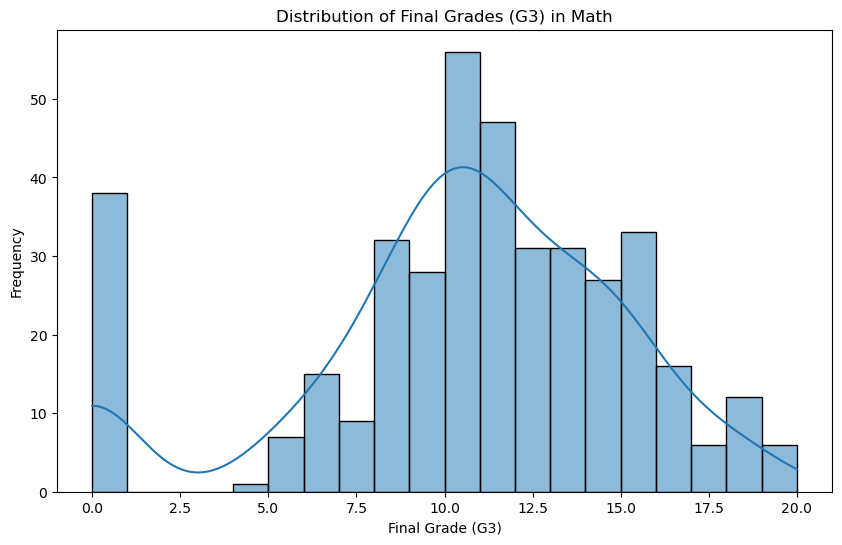

In [41]:
# Example visualizations for Math dataset
plt.figure(figsize=(10, 6))
sns.histplot(mat_df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3) in Math')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

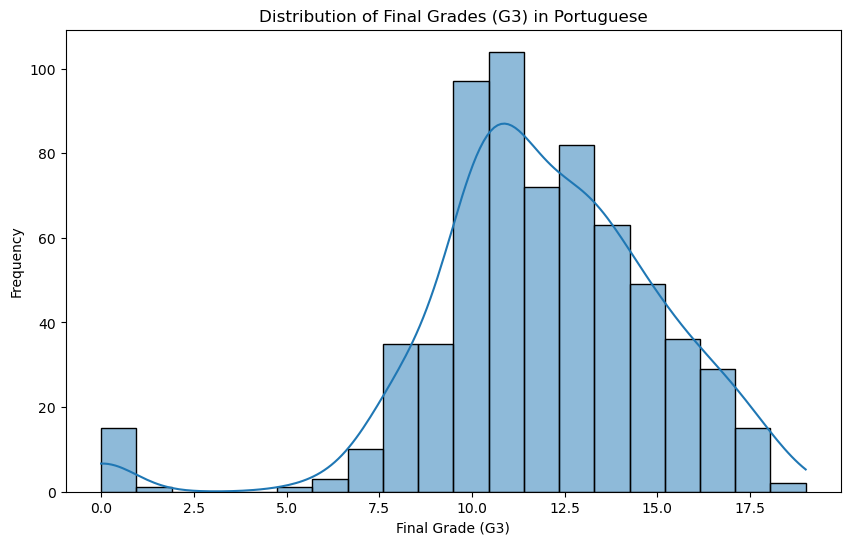

In [42]:
# Example visualizations for Portuguese dataset
plt.figure(figsize=(10, 6))
sns.histplot(por_df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3) in Portuguese')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

C:\Users\PMYLS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


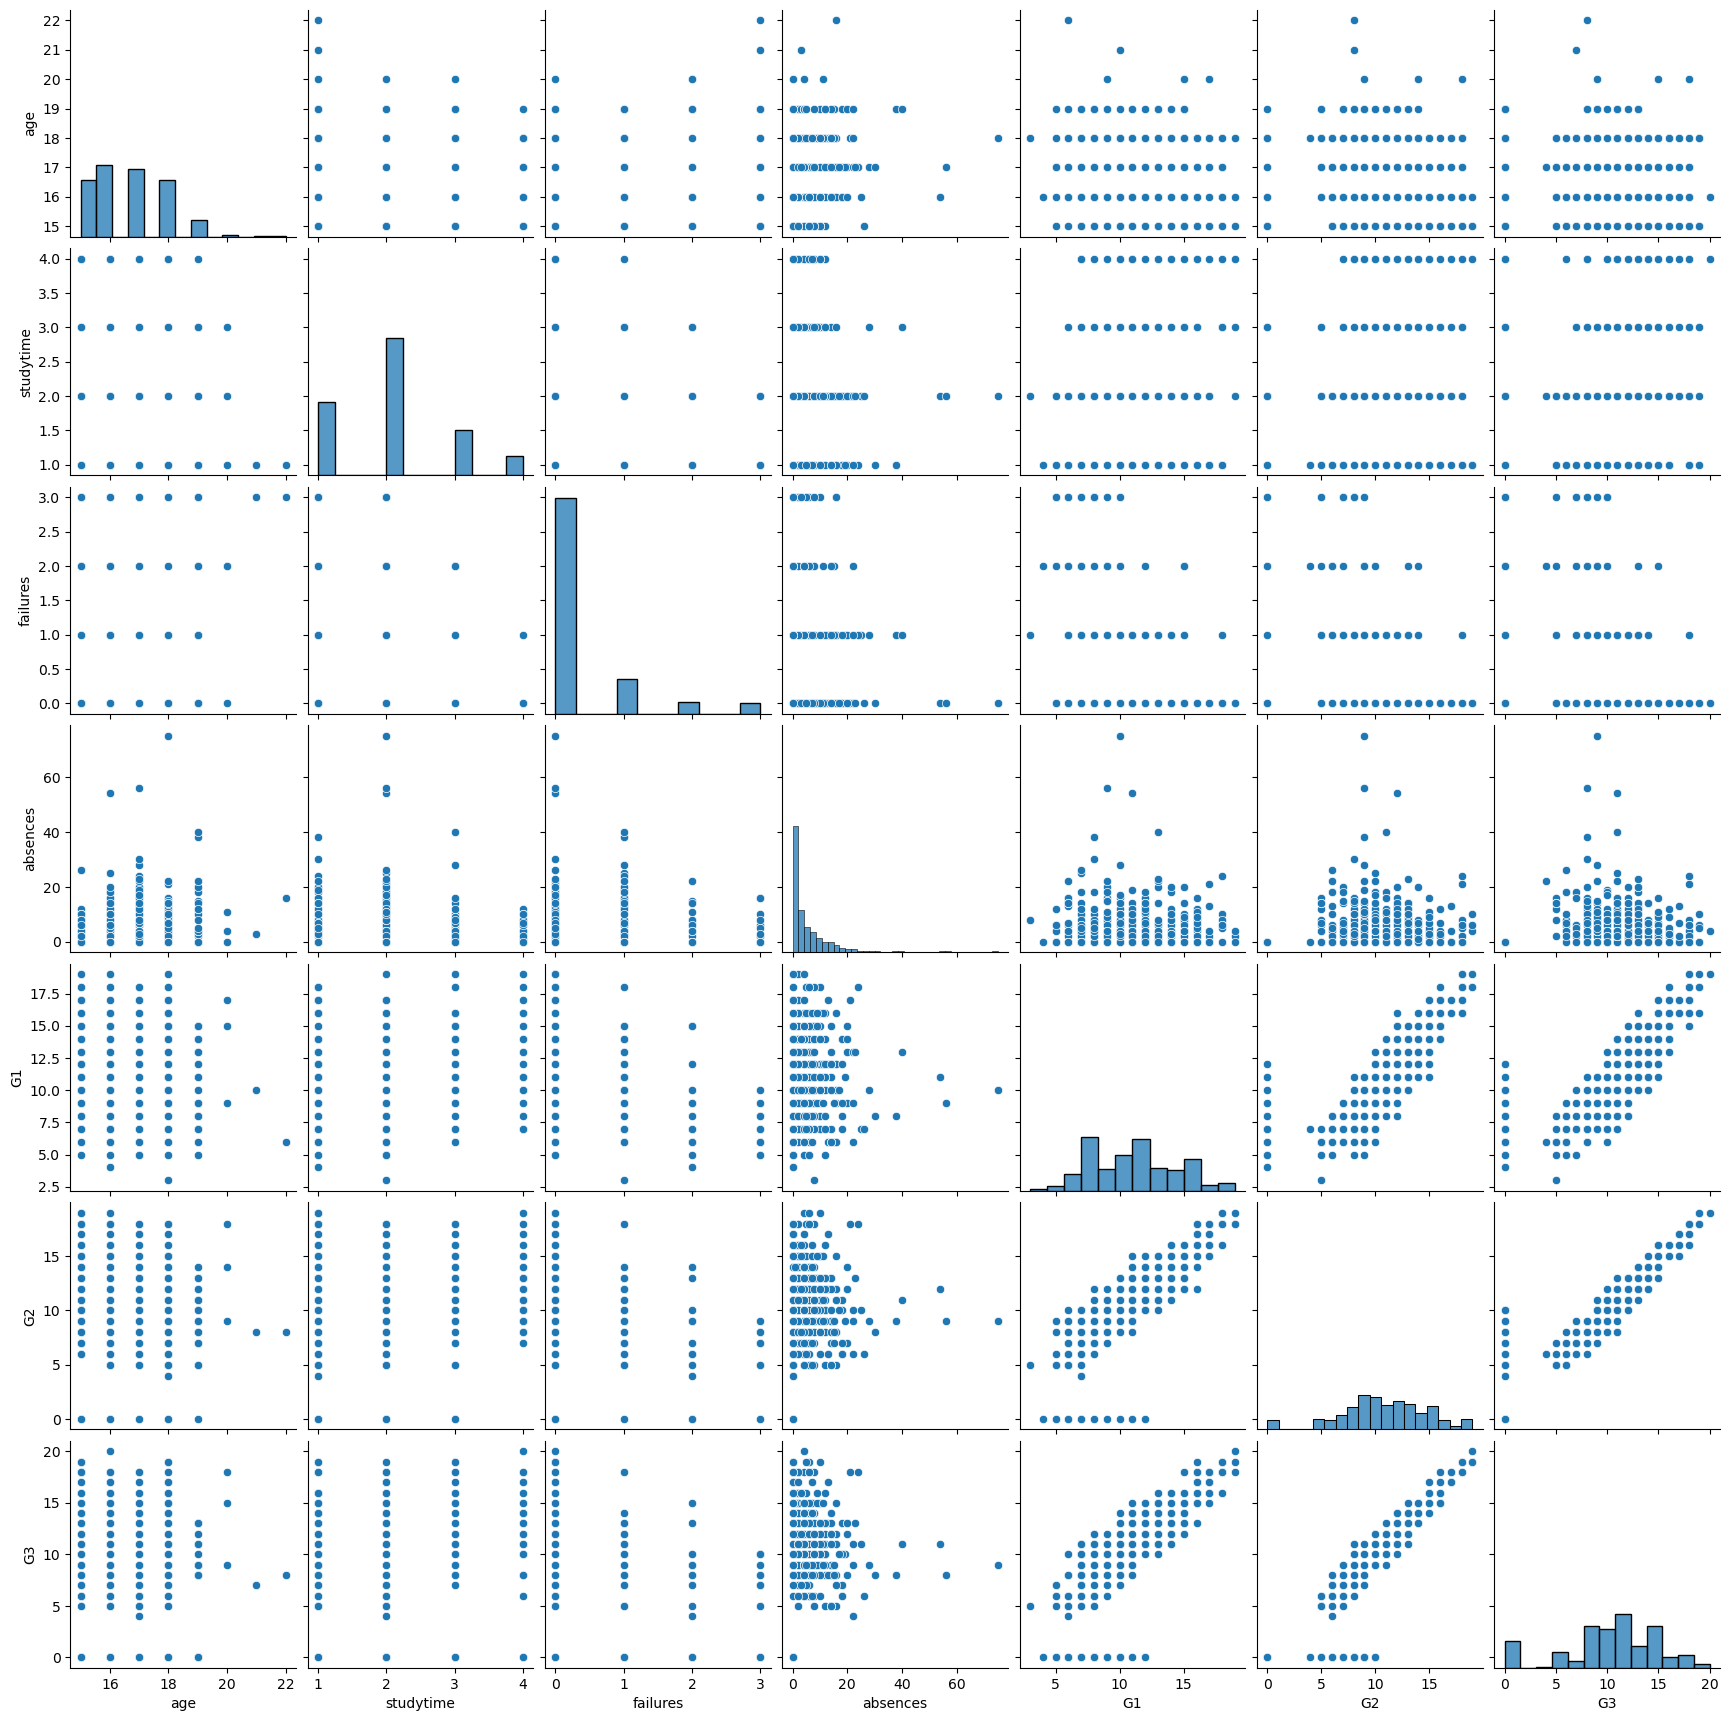

In [43]:
# Pairplot to visualize relationships between features
sns.pairplot(mat_df[['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']])
plt.show()

In [49]:
# Identify categorical columns
categorical_columns = mat_df.select_dtypes(include=['object']).columns

In [50]:
# One-hot encode the categorical variables for both datasets
mat_df_encoded = pd.get_dummies(mat_df, columns=categorical_columns, drop_first=True)
por_df_encoded = pd.get_dummies(por_df, columns=categorical_columns, drop_first=True)

In [66]:
# Ensure the columns match after encoding
missing_cols = set(mat_df_encoded.columns) - set(por_df_encoded.columns)
for col in missing_cols:
    por_df_encoded[col] = 0

por_df_encoded = por_df_encoded[mat_df_encoded.columns]

In [67]:
# Features and target variable for Math dataset
X_mat = mat_df_encoded.drop(columns=['G3', 'NB'])
y_mat = mat_df_encoded['G3']

In [68]:
# Split the data into training and testing sets
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, y_mat, test_size=0.2, random_state=42)

In [69]:
# Features and target variable for Portuguese dataset
X_por = por_df_encoded.drop(columns=['G3', 'NB'])
y_por = por_df_encoded['G3']

In [70]:
# Split the data into training and testing sets
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size=0.2, random_state=42)

In [71]:
# Train a RandomForestRegressor for Math dataset
rf_mat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mat.fit(X_train_mat, y_train_mat)

RandomForestRegressor(random_state=42)

In [72]:
# Predictions for Math dataset
y_pred_mat = rf_mat.predict(X_test_mat)

In [73]:
# Evaluate the model
mse_mat = mean_squared_error(y_test_mat, y_pred_mat)
r2_mat = r2_score(y_test_mat, y_pred_mat)

print("\nMath Dataset - RandomForestRegressor")
print(f"Mean Squared Error: {mse_mat}")
print(f"R^2 Score: {r2_mat}")


Math Dataset - RandomForestRegressor
Mean Squared Error: 3.797716455696203
R^2 Score: 0.8147911386865877


In [74]:
# Train a RandomForestRegressor for Portuguese dataset
rf_por = RandomForestRegressor(n_estimators=100, random_state=42)
rf_por.fit(X_train_por, y_train_por)

RandomForestRegressor(random_state=42)

In [75]:
# Predictions for Portuguese dataset
y_pred_por = rf_por.predict(X_test_por)

In [76]:
# Evaluate the model
mse_por = mean_squared_error(y_test_por, y_pred_por)
r2_por = r2_score(y_test_por, y_pred_por)

print("\nPortuguese Dataset - RandomForestRegressor")
print(f"Mean Squared Error: {mse_por}")
print(f"R^2 Score: {r2_por}")


Portuguese Dataset - RandomForestRegressor
Mean Squared Error: 1.5398115384615385
R^2 Score: 0.8420984017378219


In [77]:
# Conclusion and Interpretation
print("\nConclusion:")
print(f"RandomForestRegressor for Math dataset achieved an R^2 score of {r2_mat:.2f} and MSE of {mse_mat:.2f}.")
print(f"RandomForestRegressor for Portuguese dataset achieved an R^2 score of {r2_por:.2f} and MSE of {mse_por:.2f}.")


Conclusion:
RandomForestRegressor for Math dataset achieved an R^2 score of 0.81 and MSE of 3.80.
RandomForestRegressor for Portuguese dataset achieved an R^2 score of 0.84 and MSE of 1.54.


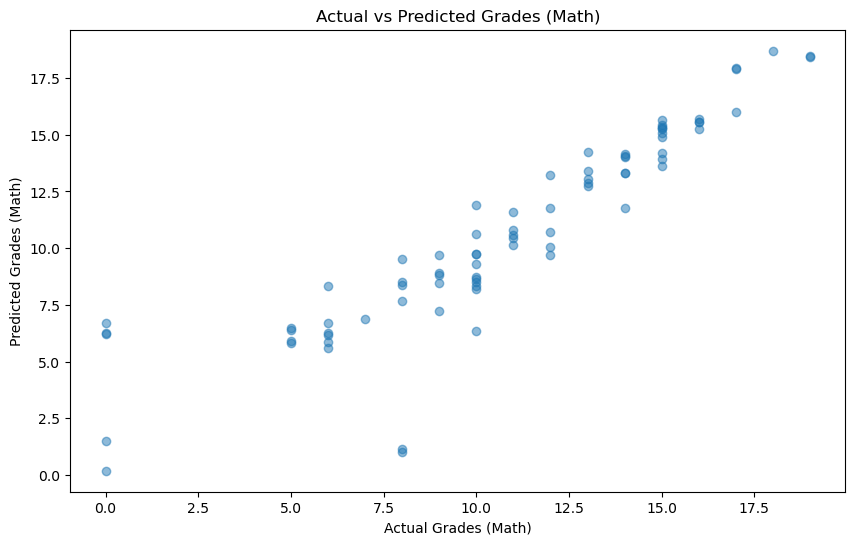

In [78]:
# Further analysis and visualization of the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_mat, y_pred_mat, alpha=0.5)
plt.xlabel('Actual Grades (Math)')
plt.ylabel('Predicted Grades (Math)')
plt.title('Actual vs Predicted Grades (Math)')
plt.show()

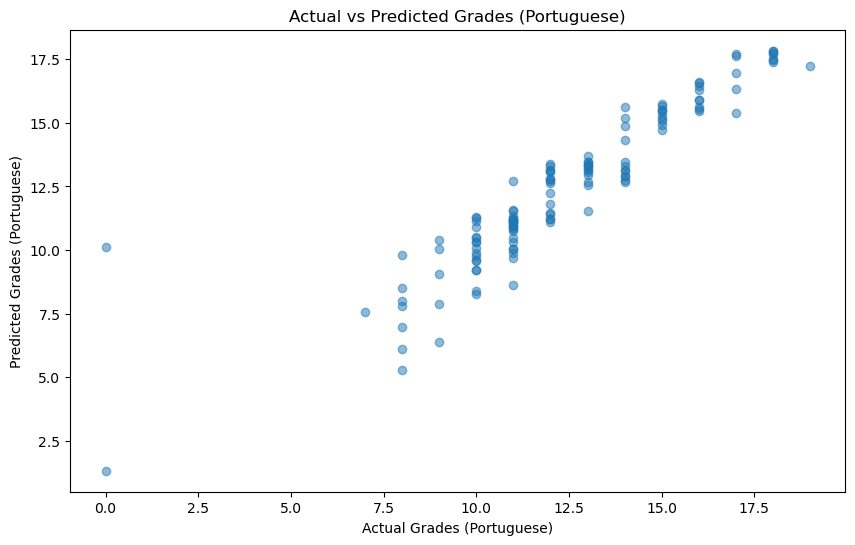

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_por, y_pred_por, alpha=0.5)
plt.xlabel('Actual Grades (Portuguese)')
plt.ylabel('Predicted Grades (Portuguese)')
plt.title('Actual vs Predicted Grades (Portuguese)')
plt.show()

In [81]:
# Perform 5-fold cross-validation on the Math dataset
cv_scores_mat = cross_val_score(rf_mat, X_mat, y_mat, cv=5, scoring='r2')
print(f"Cross-Validated R^2 Scores for Math Dataset: {cv_scores_mat}")
print(f"Average Cross-Validated R^2 Score for Math Dataset: {cv_scores_mat.mean()}")

Cross-Validated R^2 Scores for Math Dataset: [0.7711521  0.82107737 0.86531169 0.86667028 0.82605946]
Average Cross-Validated R^2 Score for Math Dataset: 0.8300541796170438


In [82]:
# Hyperparameter tuning for the RandomForestRegressor using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_mat, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_mat, y_train_mat)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated R^2 score: {grid_search.best_score_}")

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated R^2 score: 0.9043063225473705


In [83]:
# Evaluate the best model on the test set
best_rf_mat = grid_search.best_estimator_
y_pred_mat_best = best_rf_mat.predict(X_test_mat)
mse_mat_best = mean_squared_error(y_test_mat, y_pred_mat_best)
r2_mat_best = r2_score(y_test_mat, y_pred_mat_best)

print(f"Mean Squared Error (Math) after Hyperparameter Tuning: {mse_mat_best}")
print(f"R^2 Score (Math) after Hyperparameter Tuning: {r2_mat_best}")

Mean Squared Error (Math) after Hyperparameter Tuning: 3.797716455696203
R^2 Score (Math) after Hyperparameter Tuning: 0.8147911386865877
